## Dirbame su klasifikacijos problemomis

- Išmėginsime logistinę regresiją
- Atvaizduosime decision boundary
- Pradedame dirbti su vaizdais

In [114]:
#įsikeliame reikalingas bibliotekas

import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import decomposition
from sklearn import datasets

import keras

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# from mlxtend.plotting import plot_decision_regions

In [115]:
# Sukuriame duomenų rinkinį
X, y = datasets.make_classification(n_classes=2, n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [116]:
X.shape

(500, 2)

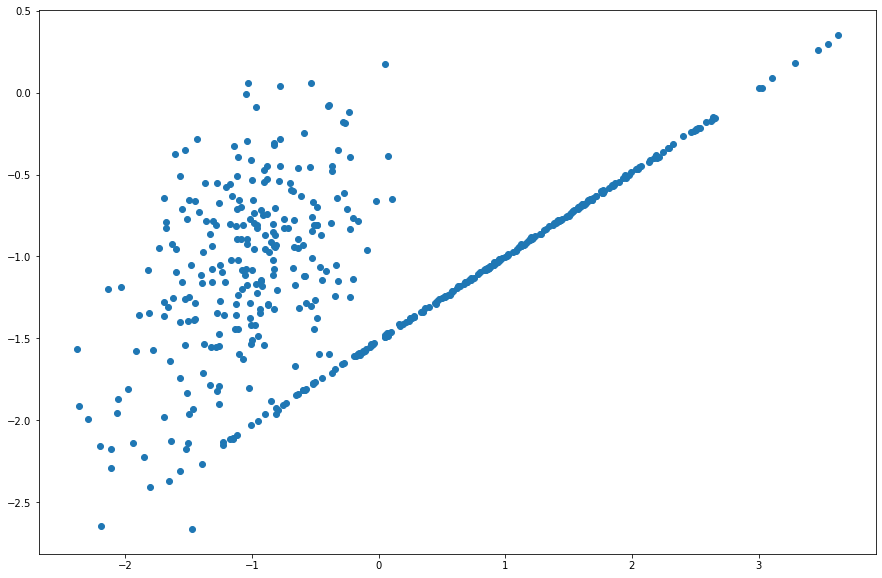

In [117]:
#Atvaizduojame

plt.scatter(X[:, 0], X[:, 1])

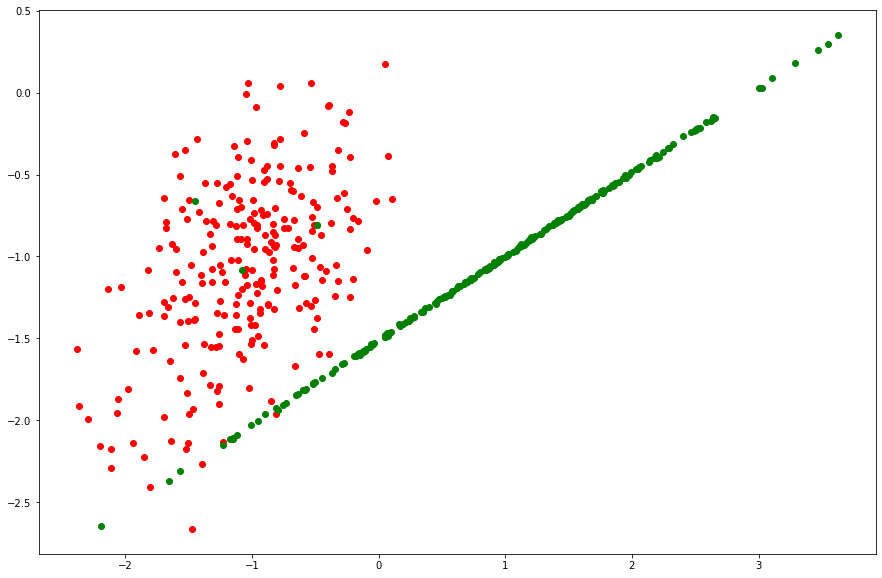

In [118]:
#Atvaizduojame su klasėmis

for i in range(2): 
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)

In [127]:
#Sukuriame modelį

model = keras.models.Sequential()

#pridedame sluoksnį su vienu tašku ("neuronu")
model.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#Standartizuojame:

X = (X-X.mean())/X.std()
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [120]:
#Mokome

model.fit(X, y, epochs = 200, )

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 1.3830 - accuracy: 0.1400
Epoch 2/200
16/16 [==============================] - 0s 748us/step - loss: 1.3704 - accuracy: 0.1340
Epoch 3/200
16/16 [==============================] - 0s 745us/step - loss: 1.3575 - accuracy: 0.1320
Epoch 4/200
16/16 [==============================] - 0s 938us/step - loss: 1.3450 - accuracy: 0.1280
Epoch 5/200
16/16 [==============================] - 0s 997us/step - loss: 1.3324 - accuracy: 0.1240
Epoch 6/200
16/16 [==============================] - 0s 997us/step - loss: 1.3199 - accuracy: 0.1240
Epoch 7/200
16/16 [==============================] - 0s 1000us/step - loss: 1.3075 - accuracy: 0.1240
Epoch 8/200
16/16 [==============================] - 0s 997us/step - loss: 1.2948 - accuracy: 0.1200
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 1.2830 - accuracy: 0.1200
Epoch 10/200
16/16 [==============================] - 0s 933us/step - loss: 1.2709 - accuracy:

16/16 [==============================] - 0s 873us/step - loss: 0.6908 - accuracy: 0.5080
Epoch 81/200
16/16 [==============================] - 0s 875us/step - loss: 0.6860 - accuracy: 0.5240
Epoch 82/200
16/16 [==============================] - 0s 935us/step - loss: 0.6811 - accuracy: 0.5440
Epoch 83/200
16/16 [==============================] - 0s 873us/step - loss: 0.6765 - accuracy: 0.5560
Epoch 84/200
16/16 [==============================] - 0s 810us/step - loss: 0.6718 - accuracy: 0.5620
Epoch 85/200
16/16 [==============================] - 0s 873us/step - loss: 0.6672 - accuracy: 0.5720
Epoch 86/200
16/16 [==============================] - ETA: 0s - loss: 0.6440 - accuracy: 0.59 - 0s 810us/step - loss: 0.6626 - accuracy: 0.5840
Epoch 87/200
16/16 [==============================] - 0s 870us/step - loss: 0.6582 - accuracy: 0.6020
Epoch 88/200
16/16 [==============================] - 0s 810us/step - loss: 0.6537 - accuracy: 0.6200
Epoch 89/200
16/16 [==============================] -

16/16 [==============================] - 0s 810us/step - loss: 0.4378 - accuracy: 0.9020
Epoch 160/200
16/16 [==============================] - 0s 873us/step - loss: 0.4356 - accuracy: 0.9040
Epoch 161/200
16/16 [==============================] - 0s 935us/step - loss: 0.4335 - accuracy: 0.9040
Epoch 162/200
16/16 [==============================] - 0s 870us/step - loss: 0.4314 - accuracy: 0.9040
Epoch 163/200
16/16 [==============================] - 0s 872us/step - loss: 0.4293 - accuracy: 0.9040
Epoch 164/200
16/16 [==============================] - 0s 932us/step - loss: 0.4273 - accuracy: 0.9060
Epoch 165/200
16/16 [==============================] - 0s 997us/step - loss: 0.4252 - accuracy: 0.9060
Epoch 166/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.9080
Epoch 167/200
16/16 [==============================] - 0s 997us/step - loss: 0.4212 - accuracy: 0.9080
Epoch 168/200
16/16 [==============================] - 0s 873us/step - loss: 0.4192 - acc

In [121]:
y_pred = model.predict(X)

In [122]:
print(y_pred)

[[0.8710091 ]
 [0.790294  ]
 [0.6363771 ]
 [0.19541597]
 [0.2533853 ]
 [0.17728639]
 [0.69819474]
 [0.8632424 ]
 [0.70865494]
 [0.7712873 ]
 [0.65892446]
 [0.6582798 ]
 [0.28984237]
 [0.9598682 ]
 [0.61090326]
 [0.36037505]
 [0.5175348 ]
 [0.31426683]
 [0.25299296]
 [0.9620663 ]
 [0.72520816]
 [0.3433838 ]
 [0.8779309 ]
 [0.71782345]
 [0.35669103]
 [0.43183756]
 [0.28024903]
 [0.56759477]
 [0.31135964]
 [0.8872515 ]
 [0.7148042 ]
 [0.9364326 ]
 [0.90566355]
 [0.85875213]
 [0.32037875]
 [0.54819524]
 [0.9160396 ]
 [0.692017  ]
 [0.22571966]
 [0.9679204 ]
 [0.438624  ]
 [0.77527606]
 [0.74945843]
 [0.21999419]
 [0.29894435]
 [0.8628813 ]
 [0.73834765]
 [0.46382087]
 [0.57213694]
 [0.31631255]
 [0.7756052 ]
 [0.30339575]
 [0.275211  ]
 [0.88341177]
 [0.2301377 ]
 [0.25362745]
 [0.81888294]
 [0.32806417]
 [0.77421486]
 [0.9171407 ]
 [0.34431434]
 [0.84820473]
 [0.8162571 ]
 [0.2895217 ]
 [0.8074581 ]
 [0.88242686]
 [0.4295092 ]
 [0.58802277]
 [0.39768833]
 [0.46408755]
 [0.4845472 ]
 [0.40

In [123]:
y_pred = y_pred.round().ravel()

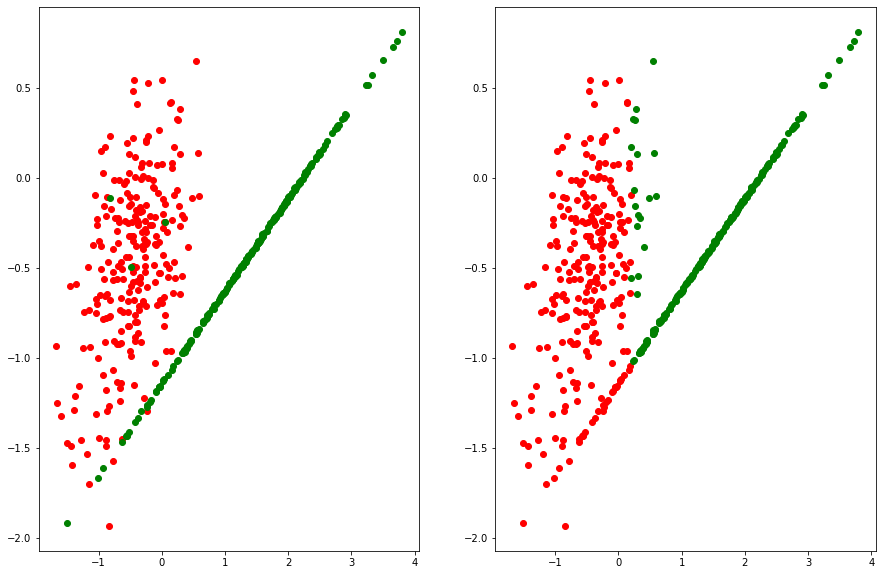

In [9]:
#Spėjimai, ant treniravmo duomenų ir palyginimas su tuo, ką gavome.

plt.subplot(1, 2, 1)
for i in range(2):
    rows = np.where(y == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)

plt.subplot(1, 2, 2)
for i in range(2):
    rows = np.where(y_pred == i)
    if i == 0:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[rows, 0], X[rows, 1], c = color)
    


In [10]:
#Atvaizduojame išmoktą decision boundary

plot_decision_regions(X, y, clf=model, legend=2)

NameError: name 'plot_decision_regions' is not defined

In [10]:
#Pamėginkime atlikti spėjimus naujiems duomenų taškams.

model.predict(np.array([-1, -2])[np.newaxis])

array([[0.23862825]], dtype=float32)

## Užduotis

- Naudojant MNIST duomenų rinkinį sukurti klasifikatorių, kuris iš vaizdo pasakytų, ar matomas skaičius lyginis, ar nelyginis.

- Įvertinkite modelio veikimą ant testavimo duomenų.

- Atlikite keletą spėjimų, įsitikinkite, kaip veikia jūsų modelis


In [78]:
#TWO CLASSES

# Model / data parameters
num_classes = 2
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [79]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train = np.array([np.reshape(cv2.resize(im, (14, 14)), (14, 14, 1)) for im in x_train])
print(y_train.shape)



y_train = np.array([int(y%2==0) for y in y_train])
y_test = np.array([int(y%2==0) for y in y_test])

print("x_train shape:", x_train.shape)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000,)
x_train shape: (60000, 14, 14, 1)


(14, 14, 1)
1


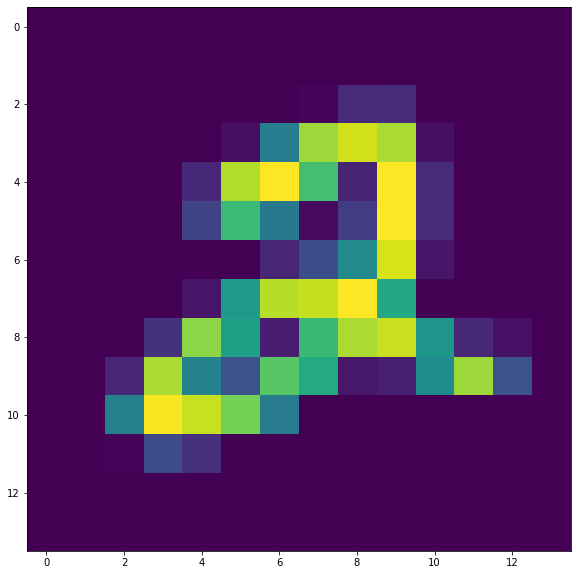

In [80]:
print(x_train[5].shape)
print(y_train[5])
plt.imshow(x_train[5, :, :, 0])

In [163]:
#Jūsų modelis:
#Sukuriame modelį
model = keras.models.Sequential()
#Nepamirškite, kad modelis priima išskleistus paveikslėlius, tam galima naudoti keras Flatten() sluoksnį.

model.add(keras.layers.Flatten(input_shape=(14, 14, 1)))
model.add(keras.layers.Dense(1, input_dim=2, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 196)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 197       
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [164]:
#Mokymas
model.fit(x_train, y_train, epochs = 50, )

Epoch 1/50
1875/1875 [==============================] - 1s 684us/step - loss: 0.1353 - accuracy: 0.8256
Epoch 2/50
1875/1875 [==============================] - 1s 713us/step - loss: 0.1090 - accuracy: 0.8640
Epoch 3/50
1875/1875 [==============================] - 1s 673us/step - loss: 0.1059 - accuracy: 0.8709
Epoch 4/50
1875/1875 [==============================] - 1s 690us/step - loss: 0.1044 - accuracy: 0.8743
Epoch 5/50
1875/1875 [==============================] - 1s 676us/step - loss: 0.1034 - accuracy: 0.8747
Epoch 6/50
1875/1875 [==============================] - 1s 709us/step - loss: 0.1027 - accuracy: 0.8765
Epoch 7/50
1875/1875 [==============================] - 1s 703us/step - loss: 0.1023 - accuracy: 0.8771
Epoch 8/50
1875/1875 [==============================] - 1s 685us/step - loss: 0.1018 - accuracy: 0.8777
Epoch 9/50
1875/1875 [==============================] - 1s 682us/step - loss: 0.1016 - accuracy: 0.8780
Epoch 10/50
1875/1875 [==============================] - 1s 684u

In [ ]:
#Modelio vertinimas naudojant testavimo duomenimis

In [165]:
x_test_reshaped = np.array([np.reshape(cv2.resize(im, (14, 14)), (14, 14, 1)) for im in x_test])

In [166]:
y_pred = model.predict(x_test_reshaped)
y_pred_ravel = y_pred.round().ravel()
print('Y predictions shape: ', y_pred.shape)
print('Y predictions ravel shape: ', y_pred_ravel.shape)

Y predictions shape:  (10000, 1)
Y predictions ravel shape:  (10000,)


(14, 14, 1)
0.0


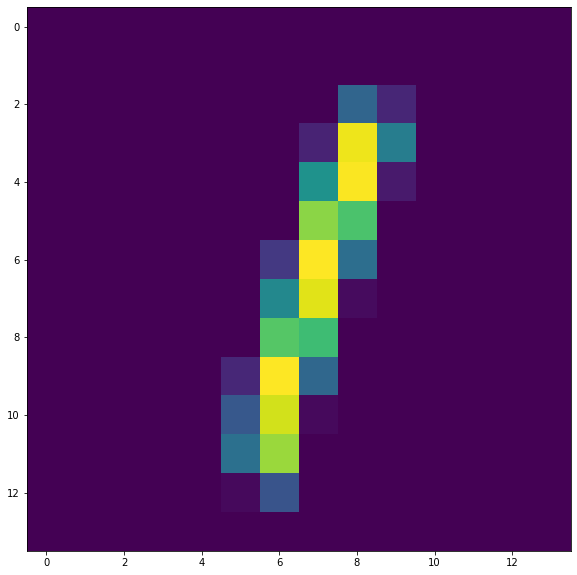

In [172]:
i = 5
print(x_test_reshaped[i].shape)
print(y_pred_ravel[i])
plt.imshow(x_test_reshaped[i, :, :, 0])